In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df = pdr.get_data_yahoo("LT.NS", start="2022-01-03", end="2024-02-25").reset_index()
df.to_csv('/content/LT.csv',index=False)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,1895.000000,1937.449951,1893.650024,1922.849976,1894.265625,1906676
1,2022-01-04,1922.849976,1943.000000,1914.550049,1937.550049,1908.747070,1643920
2,2022-01-05,1940.699951,1951.000000,1927.650024,1948.599976,1919.632812,1711667
3,2022-01-06,1944.500000,1953.000000,1919.599976,1924.500000,1895.891113,1372015
4,2022-01-07,1929.050049,1934.949951,1897.150024,1904.900024,1876.582520,1447123


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
526,2024-02-19,3400.550049,3408.000000,3335.500000,3339.850098,3339.850098,1216447
527,2024-02-20,3339.850098,3367.750000,3328.449951,3356.750000,3356.750000,1578162
528,2024-02-21,3356.899902,3356.899902,3290.050049,3296.399902,3296.399902,2430672
529,2024-02-22,3310.000000,3369.000000,3276.949951,3363.750000,3363.750000,2521388
530,2024-02-23,3363.750000,3399.899902,3340.750000,3387.949951,3387.949951,2107176


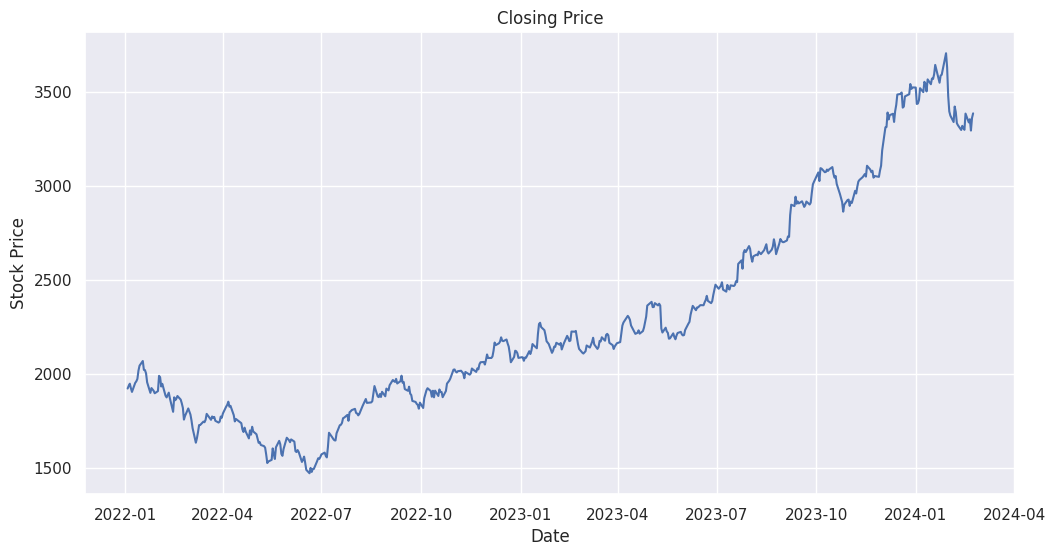

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
df = pd.read_csv('/content/LT.csv')

### Moving Average agent


In [ ]:
import pandas as pd
import numpy as np

# Function to calculate moving averages and generate buy/sell signals
def apply_moving_average_strategy(df, short_window, long_window):
    signals = pd.DataFrame(index=df.index)
    signals['signal'] = 0.0

    signals['short_ma'] = df.rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_ma'] = df.rolling(window=long_window, min_periods=1, center=False).mean()

    signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:]
                                                > signals['long_ma'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff().fillna(0)
    return signals

# Example usage:
short_window = int(0.025 * len(df))
long_window = int(0.05 * len(df))
signals = apply_moving_average_strategy(df['Close'], short_window, long_window)


In [ ]:
# Function to execute buying and selling based on signals
def buy_stock(real_movement, signal, initial_money=10000, max_buy=1, max_sell=1):
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    for i in range(len(real_movement)):
        state = signal[i]
        if state == 1 and current_inventory == 0:
            shares = min(max_buy, initial_money // real_movement[i])
            initial_money -= shares * real_movement[i]
            current_inventory += shares
            states_buy.append(i)
            print(f"Day {i}: Buy {shares} units at price {shares * real_movement[i]}, total balance {initial_money}")
        elif state == -1 and current_inventory > 0:
            sell_units = min(max_sell, current_inventory)
            current_inventory -= sell_units
            total_sell = sell_units * real_movement[i]
            initial_money += total_sell
            states_sell.append(i)
            print(f"Day {i}: Sell {sell_units} units at price {total_sell}, total balance {initial_money}")

    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

states_buy, states_sell, total_gains, invest = buy_stock(df['Close'], signals['positions'])


Day 13: Buy 1 units at price 2003.5, total balance 7996.5
Day 23: Sell 1 units at price 1947.949951171875, total balance 9944.449951171875
Day 59: Buy 1 units at price 1773.5999755859375, total balance 8170.8499755859375
Day 75: Sell 1 units at price 1657.3499755859375, total balance 9828.199951171875
Day 103: Buy 1 units at price 1652.050048828125, total balance 8176.14990234375
Day 113: Sell 1 units at price 1489.949951171875, total balance 9666.099853515625
Day 129: Buy 1 units at price 1663.0, total balance 8003.099853515625
Day 182: Sell 1 units at price 1841.199951171875, total balance 9844.2998046875
Day 198: Buy 1 units at price 1904.1500244140625, total balance 7940.1497802734375
Day 249: Sell 1 units at price 2088.949951171875, total balance 10029.099731445312
Day 261: Buy 1 units at price 2273.10009765625, total balance 7755.9996337890625
Day 276: Sell 1 units at price 2163.85009765625, total balance 9919.849731445312
Day 286: Buy 1 units at price 2134.050048828125, total ba

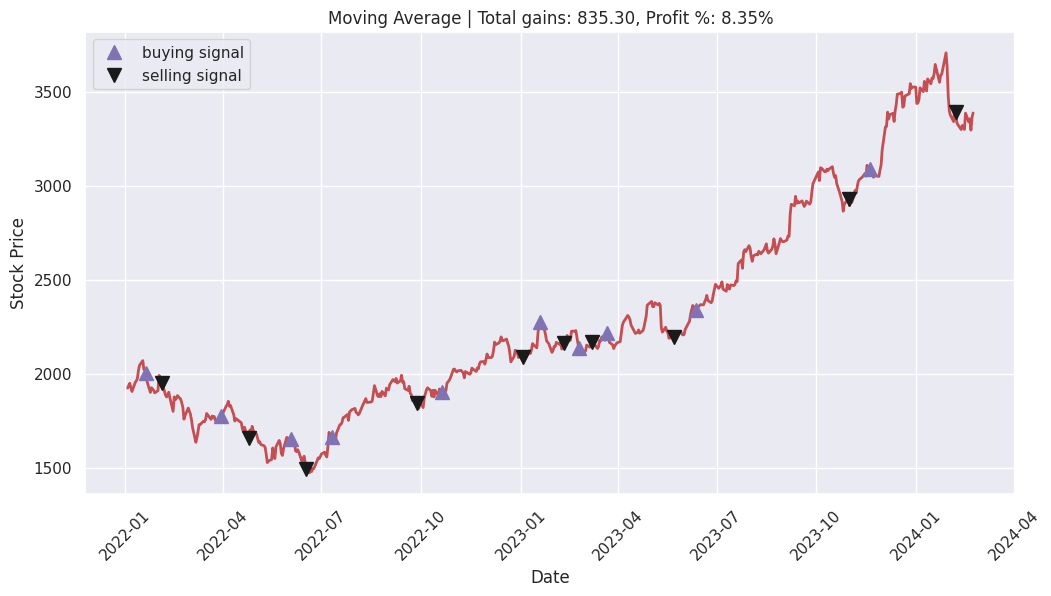

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/LT.csv')

# Extract date and close price
date = pd.to_datetime(df['Date'])
close = df['Close']

# Get the index of the first closing value
first_closing_index = close.first_valid_index()

# Extract the date and close price starting from the first closing value
date = date[first_closing_index:]
close = close[first_closing_index:]
plt.figure(figsize=(12, 6))
plt.plot(date, close, color='r', lw=2.)

# Plot markers for buying and selling signals
plt.plot(date[states_buy], close[states_buy], '^', markersize=10, color='m', label='buying signal')
plt.plot(date[states_sell], close[states_sell], 'v', markersize=10, color='k', label='selling signal')

plt.title('Moving Average | Total gains: %.2f, Profit %%: %.2f%%' % (total_gains, invest))

# Set the locator for x-axis ticks to show dates every three months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
#Calculate performance metrics
def calculate_metrics(states_buy, states_sell, close_prices, initial_money):


    # Calculate ROI based on initial investment
    ROI_initial_investment = (total_gains / initial_money) * 100

    # Calculate ROI based on total transactions
    total_investment = initial_money
    for buy_index in states_buy:
        total_investment -= close_prices[buy_index]
    for sell_index in states_sell:
        total_investment += close_prices[sell_index]
    ROI_total_investment = ((close_prices[-1] - total_investment) / total_investment) * 100

    # Calculate Sharpe Ratio (assuming risk-free rate is 0)
    returns = np.diff(close_prices) / close_prices[:-1]
    sharpe_ratio = np.sqrt(252) * np.mean(returns) / np.std(returns)

    # Calculate maximum drawdown
    max_drawdown = np.max(np.maximum.accumulate(close_prices) - close_prices) / np.max(np.maximum.accumulate(close_prices))

    # Calculate winning trades percentage
    winning_trades = len(states_sell) / (len(states_buy) + len(states_sell)) * 100

    # Calculate average return per trade
    avg_return_per_trade = total_gains / (len(states_buy) + len(states_sell))

    # Calculate average holding period
    holding_periods = [sell - buy for buy, sell in zip(states_buy, states_sell)]
    avg_holding_period = np.mean(holding_periods)

    # Other metrics such as risk of ruin, Calmar ratio, and Sortino ratio can be calculated as needed

    return total_gains, ROI_initial_investment, ROI_total_investment, sharpe_ratio, max_drawdown, winning_trades, avg_return_per_trade, avg_holding_period

#Simulate trading and compute performance metrics
initial_money = 10000
close_prices = df['Close'].values
total_gains, ROI_initial_investment, ROI_total_investment, sharpe_ratio, max_drawdown, winning_trades, avg_return_per_trade, avg_holding_period = calculate_metrics(
    states_buy, states_sell, close_prices, initial_money)

#Print performance metrics
print("Moving Average Performance Metrics:")
print("Total Gains: {:.2f}".format(total_gains))
print("Return on Investment (ROI) based on initial investment: {:.2f}%".format(ROI_initial_investment))
print("Return on Investment (ROI) based on total investment: {:.2f}%".format(ROI_total_investment))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))
print("Maximum Drawdown: {:.2f}%".format(max_drawdown * 100))
print("Winning Trades Percentage: {:.2f}%".format(winning_trades))
print("Average Return per Trade: {:.2f}".format(avg_return_per_trade))
print("Average Holding Period: {:.2f}".format(avg_holding_period))

Moving Average Performance Metrics:
Total Gains: 835.30
Return on Investment (ROI) based on initial investment: 8.35%
Return on Investment (ROI) based on total investment: -68.73%
Sharpe Ratio: 1.30
Maximum Drawdown: 16.12%
Winning Trades Percentage: 50.00%
Average Return per Trade: 41.76
Average Holding Period: 35.00


In [ ]:
import numpy as np

def sharpe_ratio(returns, risk_free_rate=0):
    """
    Calculate Sharpe Ratio.

    Parameters:
        returns (ndarray or Series): Daily returns of the investment/portfolio.
        risk_free_rate (float, optional): Annual risk-free rate of return, default is 0.

    Returns:
        float: Sharpe Ratio.
    """
    avg_return = np.mean(returns)
    std_dev = np.std(returns)
    sharpe = (avg_return - risk_free_rate) / std_dev if std_dev != 0 else np.nan
    return sharpe

# Example usage:
if __name__ == "__main__":
    # Example returns data (replace with your own data)
    returns_data = np.random.normal(0.001, 0.02, 100)  # Generating random returns data for demonstration
    risk_free_rate = 0.02  # Assumed annual risk-free rate

    # Calculate Sharpe Ratio
    sharpe = sharpe_ratio(returns_data, risk_free_rate)

    print("Sharpe Ratio:", sharpe)


Sharpe Ratio: -0.9922599066979348


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/LT.csv')

# Extract date and close price
date = pd.to_datetime(df['Date'])
close = df['Close']

# Get the index of the first closing value
first_closing_index = close.first_valid_index()

# Extract the date and close price starting from the first closing value
date = date[first_closing_index:]
close = close[first_closing_index:]

# Initialize variables for tracking trades and profits
total_trades = 0
winning_trades = 0
total_profit = 0

# Loop through buying and selling signals to calculate trades and profits
for buy_date, sell_date in zip(date[states_buy], date[states_sell]):
    # Calculate profit for the current trade
    buy_price = close[date == buy_date].values[0]
    sell_price = close[date == sell_date].values[0]
    trade_profit = sell_price - buy_price

    # Increment total trades count
    total_trades += 1

    # Check if the trade resulted in a profit
    if trade_profit > 0:
        winning_trades += 1

    # Add the trade profit to the total profit
    total_profit += trade_profit

# Calculate winning trades percentage
winning_trades_percentage = (winning_trades / total_trades) * 100

print(f"Total Trades: {total_trades}")
print(f"Winning Trades: {winning_trades}")
print(f"Winning Trades Percentage: {winning_trades_percentage:.2f}%")


Total Trades: 10
Winning Trades: 5
Winning Trades Percentage: 50.00%
